# Probelm 4
11. This question uses the Caravan data set.

In [2]:
cd /content/drive/MyDrive/Colab Notebooks/Machine Learning/HW#5

/content/drive/MyDrive/Colab Notebooks/Machine Learning/HW#5


In [3]:
#Import library 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix

%matplotlib inline
plt.style.use('seaborn-white')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
caravan=pd.read_csv("Caravan.csv", index_col=0)
caravan.head()


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No


(a) Create a training set consisting of the first 1,000 observations,
and a test set consisting of the remaining observations.

In [5]:
#Created a traininig and testing set of first  1000 observation observation by using Caravan dataset 
train = caravan.iloc[0:1000, :]
test = caravan.iloc[1000:, :]
print(train.shape)
print(test.shape)

(1000, 86)
(4822, 86)


(b) Fit a boosting model to the training set with Purchase as the
response and the other variables as predictors. Use 1,000 trees,
and a shrinkage value of 0.01. Which predictors appear to be
the most important?

In [6]:

#Boosting model approach learns slowly.
#Best performance summary: Boosting resulted in the lowest validation set test error rate.

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, make_scorer

clf = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000)

X_train = train.drop(['Purchase'], axis=1)
y_train = train[['Purchase']]
X_test = test.drop(['Purchase'], axis=1)
y_test = test[['Purchase']]

#To see fit data and measure the test error rate 
clf.fit(X=X_train, y=y_train.values.ravel())
p = clf.predict(X_test)
print("Test Error Rate is: " + str(1-accuracy_score(p, y_test)))



Test Error Rate is: 0.06594773952716715


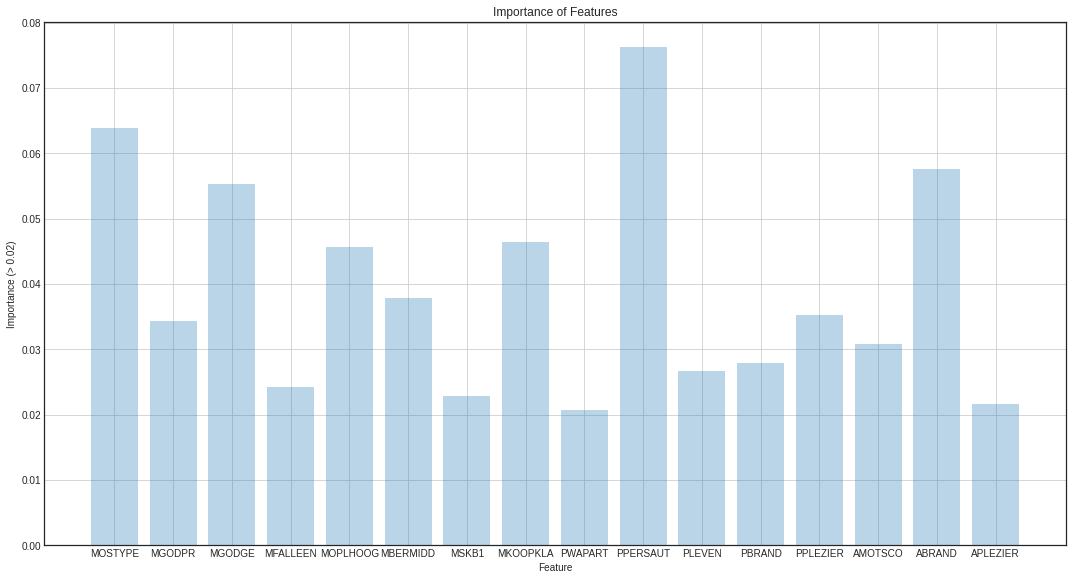

In [8]:
feature_importances = clf.feature_importances_

columns, importance = zip(*((columns, importance) for columns, importance in
                   zip(X_train.columns.tolist(), clf.feature_importances_)
                   if importance > 0.02))

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

plt.bar(list(columns), list(importance), alpha=0.3)

ax.set_xlabel('Feature')
ax.set_ylabel('Importance (> 0.02)')
plt.tight_layout()
plt.title("Importance of Features")
plt.grid()
plt.show()

#Here X axis denotes features (input ) and y axis Importance >0.02 

c)Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20 %. Form a confusion matrix. What fraction of the people predicted to make a purchase do in fact make one? How does this compare with the results obtained from applying KNN or logistic regression to this data set?

In [10]:
y_pred = pd.Series(p)
y_true = (y_test['Purchase'])
y_true.reset_index(drop=True, inplace=True)

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

#The percentage of people who are predicted to make a purchase and make one is 24.19%


Predicted,No,Yes,All
True,,,
No,4489,44,4533
Yes,274,15,289
All,4763,59,4822
